# SDG 11.2.1 

## 11.2.1
Proportion of population that has convenient access to public transport, by sex, age and persons with disabilities 

**11.2.1 is under 11.2**

## 11.2
By 2030, provide access to safe, affordable, accessible and sustainable transport systems for all, improving road safety, notably by expanding public transport, with special attention to the needs of those in vulnerable situations, women, children, persons with disabilities and older persons 


Method
<ol>
1) get public transport location data - NAPTAN a) Clean it if necessary
2) get population location data -  LSOA from ONS
3) use Fiona to read location data
4) limit to one or two locations, e.g. London and a more rural area
5) draw Euclidean Buffers around LSOA polygon centre points
6) find number of public transport stops in the polygon with “points in polygons” approach
</ol>

In [315]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt 
from shapely.geometry import Point, Polygon

In [316]:
## I have downloaded the data locally
## Location of the data is : http://naptan.app.dft.gov.uk/datarequest/GTFS.ashx
datapath = r'/home/james/Documents/SDG_11.2.1/SDG_11.2.1/data'

In [348]:
## Extracted the Stops.txt file. 
## Making into a Pandas dataframe

stops_df = pd.read_csv(os.path.join(datapath,'Stops.txt'), delimiter='\t')
stops_df.sample(15)


,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type
71367,1400EB75188,esuagmat,"Stone Cross, Milton Street (opp)",50.82067,0.28957,NaN,3.0
271211,450014676,45014676,"Methley, Park Hospital (opp)",53.74134,-1.42263,NaN,3.0
262359,4400CH0539,wsxgdjwm,"Selsey, Warner Road (adj)",50.72768,-0.79966,NaN,3.0
86513,1600GLC114,glogjdad,"Lower Slaughter, Meadow Farm (SW-bound)",51.90873,-1.73642,NaN,3.0
133116,230000000300,iowagjd,"St Helens, Guildford Road (Adjacent)",50.69907,-1.10790,NaN,3.0
266857,4400WO0074,wsxdmpgt,"Durrington, Golden Lion (adj)",50.81939,-0.41203,NaN,3.0
293250,490004445E,77171,"Wembley Park, Brook Avenue (Stop U)",51.56561,-0.28478,NaN,3.0
118529,2000G323429,wocdpdta,"Birlingham, Nursery (adj)",52.09467,-2.10745,NaN,3.0
301366,490010683E,51520,"West Harrow, Oxford Road (Stop WF)",51.58148,-0.34968,NaN,3.0
201816,340004052WES,oxfgadpd,"Carterton, Rock Road (W-bound)",51.76325,-1.59708,NaN,3.0


In [349]:

def make_geo_df(df,col_x, col_y):
    """A function to create a geodataframe from a datafrom. Supply the dataframe, and the names of lon and lat columns."""
    crs = {'init': 'epsg:4326'} #"EPSG:4326" "EPSG:27700"
    geometry = [Point(xy) for xy in zip(df[col_x], df[col_y])]
    geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return geo_df

In [350]:
## Creating the GeoDataframe version of stops_df
stops_geo_df = make_geo_df(stops_df,'stop_lon','stop_lat')

## Deleting stops_df to free up memory
del stops_df

In [351]:
## Checking the coordinate reference system of stops_geo_df
## 227700 is expected
stops_geo_df.crs

{'init': 'epsg:4326'}

In [352]:
## Getting a sample of the new geo_df

stops_geo_df.sample(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type,geometry
101164,1800ZZMANHY1,NaN,"Newhey, Newhey (Manchester Metrolink) (WestEnt...",53.60120,-2.09515,NaN,NaN,POINT (-2.09515 53.60120)
264169,4400HR0654,wsxdwadj,"Watersfield, Highfields (SW-Bound)",50.93040,-0.56460,NaN,3.0,POINT (-0.56460 50.93040)
254026,43000552501,nwmgtawa,"Walmley, Ashurst Rd (adj)",52.53702,-1.79556,NaN,3.0,POINT (-1.79556 52.53702)
60235,1190TOA10300,tbydjpt,"Livermead, Livermead Cliff (S-bound)",50.45549,-3.54543,NaN,3.0,POINT (-3.54543 50.45549)
174869,2900W5613,NFOGJAWJ,"North Walsham, Harvey Drive (opp)",52.82945,1.38901,NaN,3.0,POINT (1.38901 52.82945)
163944,2700LSRD2493,linatdam,"Skegness, Coach Station",53.14180,0.33342,NaN,3.0,POINT (0.33342 53.14180)
10259,030056490001,brkmwdt,"Wash Common, Villiers Way (Eastbound)",51.37910,-1.35026,NaN,3.0,POINT (-1.35026 51.37910)
235992,40004409221B,surdjpwd,"Tadworth, Merland Rise (opp)",51.29881,-0.23573,NaN,3.0,POINT (-0.23573 51.29881)
206310,3590E066700,telajdtg,"Shawbirch, Hopkins Heath (opp)",52.72150,-2.53471,NaN,3.0,POINT (-2.53471 52.72150)
351792,61901018,29767483,"Barrhill, Blair Farm (opp)",55.09786,-4.75409,NaN,3.0,POINT (-4.75409 55.09786)


In [353]:
## Some stops in London contain the code 49001, will use that to filter for the moment
some_stops_in_LND = stops_geo_df[stops_geo_df.stop_id.str.contains('49001')].sample(10)


In [354]:
# Building the map of Local Authority Districts

map_data_path = r'/home/james/Documents/SDG_11.2.1/SDG_11.2.1/data/Local Authority Districts (December 2017) Generalised Clipped Boundaries in United Kingdom (WGS84)'
locAuth_map_df = gpd.read_file(os.path.join(map_data_path,'Local_Authority_Districts_December_2017_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp'))

### I have also downloaded the output area for London, but am struggling with the CRS
# OA_2011_London_gen_MHW.shp'

In [355]:
## Testing that I can filter based on placename, e.g. Islington
locAuth_map_df[map_df['lad17nm']=='Islington']


,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
186,312,E09000019,Islington,None,531158,184647,-0.10992,51.5455,0.001923,0.235052,"POLYGON ((-0.11920 51.57465, -0.11879 51.57433..."


In [356]:
# likewise, I can filter on the lad17cd code. I will use the code to filter for places in London
## I was told 'E09' is for London
locAuth_map_df[locAuth_map_df.lad17cd.str.contains('E09')]

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
53,298,E09000005,Brent,None,519615,186468,-0.275680,51.5644,0.005603,0.456380,"POLYGON ((-0.26875 51.60087, -0.26136 51.59467..."
98,318,E09000025,Newham,None,540721,183327,0.027369,51.5313,0.004689,0.402297,"POLYGON ((0.05408 51.55984, 0.05471 51.55909, ..."
101,319,E09000026,Redbridge,None,543512,189478,0.070085,51.5859,0.007315,0.550043,"POLYGON ((0.03113 51.62274, 0.03582 51.61882, ..."
103,325,E09000032,Wandsworth,None,525152,174137,-0.200210,51.4524,0.004431,0.456191,"POLYGON ((-0.12797 51.48498, -0.12910 51.48254..."
106,310,E09000017,Hillingdon,None,508166,183120,-0.441820,51.5366,0.014998,0.717381,"POLYGON ((-0.49574 51.63154, -0.49514 51.63105..."
122,326,E09000033,Westminster,None,528268,180871,-0.152950,51.5122,0.002779,0.310957,"POLYGON ((-0.17574 51.53871, -0.17511 51.53814..."
176,311,E09000018,Hounslow,None,512744,174965,-0.378440,51.4624,0.007241,0.720192,"MULTIPOLYGON (((-0.28237 51.50336, -0.27948 51..."
186,312,E09000019,Islington,None,531158,184647,-0.109920,51.5455,0.001923,0.235052,"POLYGON ((-0.11920 51.57465, -0.11879 51.57433..."
188,313,E09000020,Kensington and Chelsea,None,525757,179053,-0.189760,51.4964,0.001572,0.241396,"POLYGON ((-0.22918 51.53066, -0.22928 51.53042..."
195,314,E09000021,Kingston upon Thames,None,519508,167389,-0.283670,51.3930,0.004814,0.404645,"POLYGON ((-0.25271 51.42283, -0.25123 51.41905..."


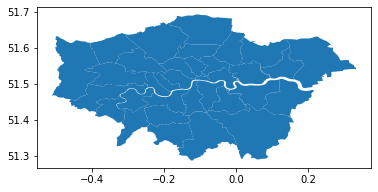

In [357]:
## Making a filtered geo_df of just the places with 'E09' in their string
## rathter than using str.contains, I'll use == instead
lond_districts = locAuth_map_df[locAuth_map_df.lad17cd.str[:3]=='E09']
_ = lond_districts.plot()

In [358]:
lond_districts.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
53,298,E09000005,Brent,None,519615,186468,-0.275680,51.5644,0.005603,0.456380,"POLYGON ((-0.26875 51.60087, -0.26136 51.59467..."
98,318,E09000025,Newham,None,540721,183327,0.027369,51.5313,0.004689,0.402297,"POLYGON ((0.05408 51.55984, 0.05471 51.55909, ..."
101,319,E09000026,Redbridge,None,543512,189478,0.070085,51.5859,0.007315,0.550043,"POLYGON ((0.03113 51.62274, 0.03582 51.61882, ..."
103,325,E09000032,Wandsworth,None,525152,174137,-0.200210,51.4524,0.004431,0.456191,"POLYGON ((-0.12797 51.48498, -0.12910 51.48254..."
106,310,E09000017,Hillingdon,None,508166,183120,-0.441820,51.5366,0.014998,0.717381,"POLYGON ((-0.49574 51.63154, -0.49514 51.63105..."


In [359]:
# Make a polygon to border the whole of London
## make a temp dataframe
_ = lond_districts
## make an extra column 'city_name' on which to dissolve on, making them all the same value, 'London'
_.loc[:,'city_name'] = 'London'
# ## make the polygon with dissolve, using city_name
whole_london_poly = _.dissolve(by='city_name')

/home/james/anaconda3/envs/SDG_11.2.1/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/james/anaconda3/envs/SDG_11.2.1/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


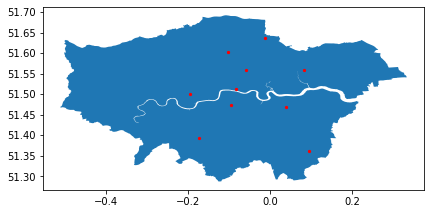

In [360]:
## plot the whole_london_poly polygon 
fig, ax = plt.subplots()
_ =  whole_london_poly.plot(ax=ax)
_ = some_stops_in_LND.plot(ax=ax, color='red', markersize=5)
plt.tight_layout()

In [364]:
### Some of these stops are within London, but using "within" or "contains" gives all false
any(some_stops_in_LND.within(whole_london_poly))
any(whole_london_poly.contains(some_stops_in_LND))
## but actually all of these stops are within the london polygon

False

In [366]:
#  checking if the CRS is the same in each DF. 
whole_london_poly.crs == some_stops_in_LND.crs 
# the crs is the same

True

In [368]:
#  Checking the CRS of Stops
some_stops_in_LND.crs

{'init': 'epsg:4326'}

In [369]:
#  Checking the CRS of London_lads
whole_london_poly.crs

{'init': 'epsg:4326'}

In [372]:
# Changing the CRS to 27700

# new_crs_whole_london_poly
new_crs_some_stops_in_LND = some_stops_in_LND
new_crs_some_stops_in_LND.to_crs(epsg=27700)

# London polygon
new_crs_whole_london_poly = whole_london_poly
new_crs_whole_london_poly.to_crs(epsg=27700)


,geometry,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths
city_name,,,,,,,,,,,
London,"MULTIPOLYGON (((516664.571 173281.384, 516396....",298,E09000005,Brent,NaN,519615,186468,-0.27568,51.5644,0.005603,0.45638


In [375]:
new_crs_some_stops_in_LND.within(new_crs_whole_london_poly)

301264    False
301625    False
303163    False
303961    False
304527    False
305802    False
305822    False
306793    False
306810    False
308262    False
London    False
dtype: bool

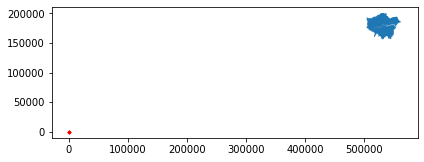

In [347]:
## plot the new_crs_whole_london_poly polygon 
fig, ax = plt.subplots()
_ =  new_crs_whole_london_poly.plot(ax=ax)
_ = some_stops_in_LND.plot(ax=ax, color='red', markersize=5)
plt.tight_layout()

In [53]:
k_u_thames = map_df[map_df['NAME']=='Kingston upon Thames']
k_u_thames.geometry

0    POLYGON ((516401.600 160201.800, 516407.300 16...
Name: geometry, dtype: geometry

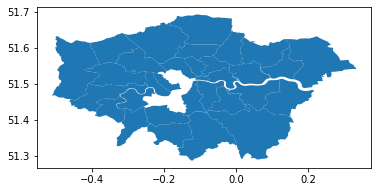

In [117]:
london_lads.plot()

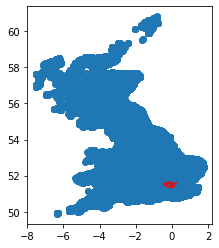

In [120]:
fig, ax = plt.pyplot.subplots()

# _ = Wandsworth_034B_df.plot(ax=ax, facecolor='red')
# _ = k_u_thames.plot(ax=ax, facecolor='red')
_ = stops_geo_df.plot(ax=ax)
_ = london_lads.plot(ax=ax, facecolor='red')